### Tyler's Visualizations for Tech Blues

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import wrangle2
import explore2
import tyler_explore

In [2]:
# creating a color palette for charts
malibu = '#7CCDFF'
caribbean_green = '#01D38E'
flamingo = '#EC4C36'
keppel = '#35A2A1'
amber = '#FFBD0B'
# colors = ['#7CCDFF', '#01D38E', '#EC4C36', '#35A2A1', '#FFBD0B']
colors = [keppel, amber, flamingo, malibu, caribbean_green,]
sns.set_palette(sns.color_palette(colors))

In [3]:
strings_df['leave'].value_counts()

NameError: name 'strings_df' is not defined

In [4]:
# use our 'get_survey_data' function to bring in the data
df = wrangle2.get_survey_data('survey2.csv')

In [5]:
# initial prep for object data
strings_df = wrangle2.prep_the_strings(df)

In [6]:
# initial prep for encoding objects into integers
encoded_df = wrangle2.prep_encode(strings_df)

In [7]:
encoded_df.columns

Index(['unnamed: 0', 'timestamp', 'age', 'gender', 'country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'company_size',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [8]:
strings_df['obs_consequence'].value_counts()

0    842
1    115
Name: obs_consequence, dtype: int64

### Breakdown of gender among entire population

In [9]:
# gender_df = encoded_df['gender']

In [10]:
# type(gender_df)

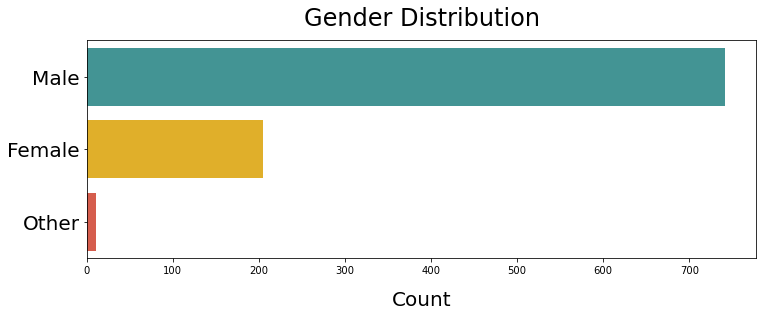

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(y='gender', data=encoded_df, color=keppel, palette=colors)
plt.title('Gender Distribution', fontsize=24, pad=15)
plt.yticks(np.arange(3), ['Male', 'Female', 'Other'], fontsize=20)
plt.xlabel('Count', fontsize=20, labelpad=15)
plt.ylabel(None)
plt.savefig('gender_barh.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

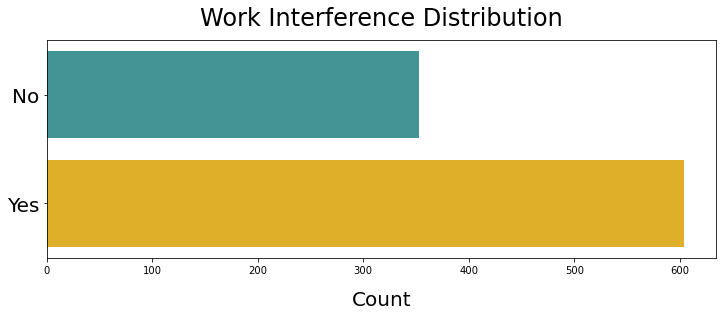

In [12]:
plt.figure(figsize=(12,4))
sns.countplot(y='work_interfere', data=encoded_df, color=keppel, palette=colors)
plt.title('Work Interference Distribution', fontsize=24, pad=15)
plt.yticks(np.arange(2), ['No', 'Yes'], fontsize=20)
plt.xlabel('Count', fontsize=20, labelpad=15)
plt.ylabel(None)
plt.savefig('work_interfere_barh.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

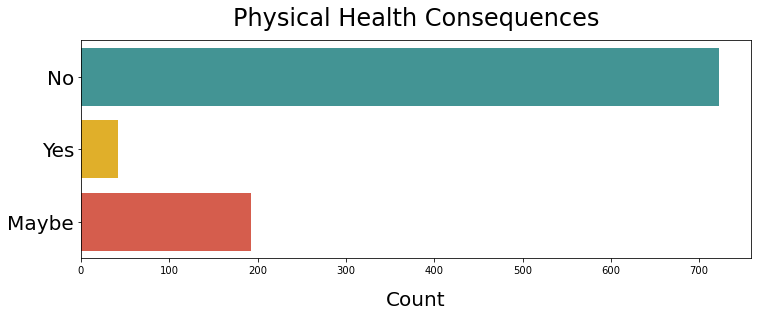

In [12]:
plt.figure(figsize=(12,4))
sns.countplot(y='phys_health_consequence', data=encoded_df, color=keppel, palette=colors)
plt.title('Physical Health Consequences', fontsize=24, pad=15)
plt.yticks(np.arange(3), ['No', 'Yes', 'Maybe'], fontsize=20)
plt.xlabel('Count', fontsize=20, labelpad=15)
plt.ylabel(None)
plt.savefig('phys_health_uni_barh.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

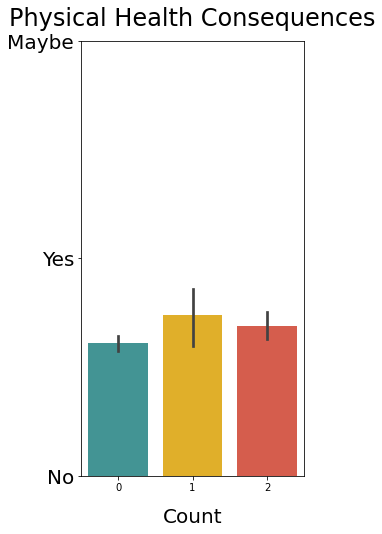

In [13]:
plt.figure(figsize=(4,8))
sns.barplot(x='phys_health_consequence', y='work_interfere', data=encoded_df, color=keppel, palette=colors)
plt.title('Physical Health Consequences', fontsize=24, pad=15)
plt.yticks(np.arange(3), ['No', 'Yes', 'Maybe'], fontsize=20)
plt.xlabel('Count', fontsize=20, labelpad=15)
plt.ylabel(None)
# plt.savefig('phys_health_uni_barh.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

In [14]:
hot_df = explore2.one_hot(encoded_df)

In [15]:
gender_df = hot_df[['gender_0', 'gender_1', 'gender_2']]

In [16]:
gender_0 = pd.Series(gender_df['gender_0'].sum())
gender_1 = pd.Series(gender_df['gender_1'].sum())
gender_2 = pd.Series(gender_df['gender_2'].sum())
gender_3 = pd.Series(gender_0 + gender_1 + gender_2)

In [17]:
gender_df = pd.concat([gender_0, gender_1, gender_2, gender_3], axis=1).fillna(0).astype(int)
gender_df.columns = ['male', 'female', 'other', 'all']
gender_df.head()

,male,female,other,all
0,741,205,11,957


In [18]:
import matplotlib as mpl

<Figure size 2160x432 with 0 Axes>

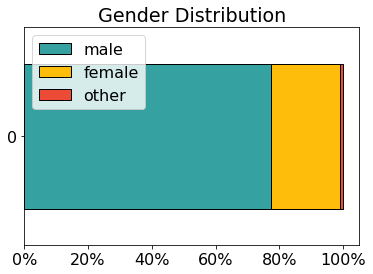

In [19]:
plt.figure(figsize=(30, 6))
plt.rc('font', size=16)
# axis=1 in .apply means row by row
(gender_df.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='male')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('Gender Distribution')
plt.ylabel(None)
plt.yticks(None)
plt.legend(loc=0)


plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
plt.savefig('gender_bar.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

<AxesSubplot:xlabel='gender'>

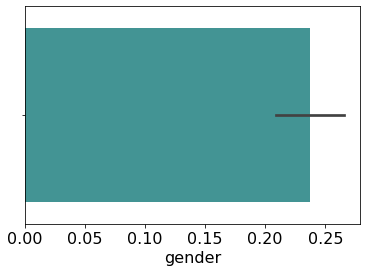

In [20]:
sns.barplot(x='gender', data=encoded_df, hue='gender')

In [21]:
from matplotlib import cm

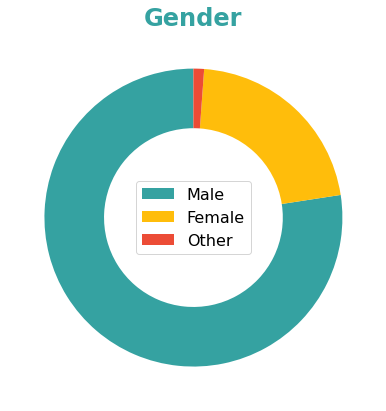

In [22]:
# visualize distribution of gender
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
cs_customer= np.linspace(0, 1, 5)
gender = ['Male', 'Female', 'Other']
data = [741,205,11]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=90)
plt.legend(wedges, gender, loc="center",fontsize=16)
ax.set_title("Gender", color=keppel, fontdict={'fontsize': 24, 'fontweight': 'bold'})
fig.tight_layout()
plt.savefig('gender_donut.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

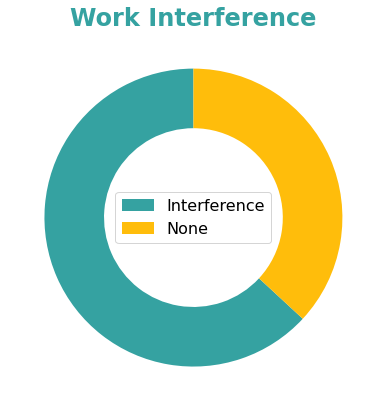

In [23]:
# visualize distribution of target variable
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
cs_customer= np.linspace(0, 1, 5)
target = ['Interference', 'None']
data = [604,353]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=90)
plt.legend(wedges, target, loc="center",fontsize=16)
ax.set_title("Work Interference", color=keppel, fontdict={'fontsize': 24, 'fontweight': 'bold'})
fig.tight_layout()
plt.savefig('interference_donut.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

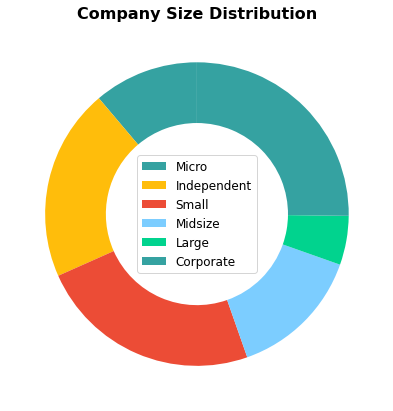

In [24]:
# visualize distribution of company size
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
cs_customer= np.linspace(0, 1, 5)
target = ['Micro', 'Independent', 'Small', 'Midsize', 'Large', 'Corporate']
data = [107, 196, 227, 136, 50, 241]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=90)
plt.legend(wedges, target, loc="center",fontsize=12)
ax.set_title("Company Size Distribution", fontdict={'fontsize': 16, 'fontweight': 'bold'})
fig.tight_layout()
# plt.savefig('company_size_donut.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

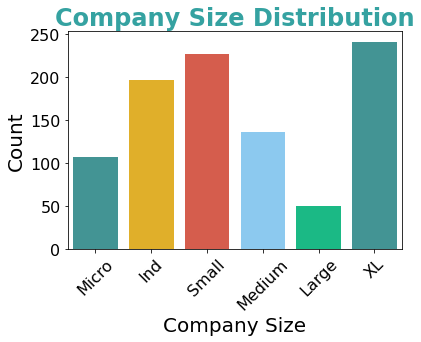

In [27]:
sns.countplot(encoded_df['company_size'], palette=colors)
plt.xticks(np.arange(6), labels=['Micro', 'Ind', 'Small', 'Medium', 'Large', 'XL'], rotation = 45, fontsize=16)
plt.yticks(fontsize=16)
plt.title('Company Size Distribution', color=keppel, fontdict={'fontsize': 24, 'fontweight': 'bold'})
plt.ylabel('Count', fontsize=20)
plt.xlabel('Company Size', fontsize=20)
plt.savefig('please_work.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

In [26]:
comp_df = hot_df[['company_size_0', 'company_size_1', 'company_size_2', 'company_size_3', 'company_size_4', 'company_size_5']]

In [27]:
company_size_0 = pd.Series(comp_df['company_size_0'].sum())
company_size_1 = pd.Series(comp_df['company_size_1'].sum())
company_size_2 = pd.Series(comp_df['company_size_2'].sum())
company_size_3 = pd.Series(comp_df['company_size_3'].sum())
company_size_4 = pd.Series(comp_df['company_size_4'].sum())
company_size_5 = pd.Series(comp_df['company_size_5'].sum())
company_size_6 = pd.Series(company_size_0 + company_size_1 + company_size_2 + company_size_3 + company_size_4 + company_size_5)

In [28]:
company_size_df = pd.concat([company_size_0, company_size_1, company_size_2, company_size_3, company_size_4, company_size_5, company_size_6], axis=1).fillna(0).astype(int)
company_size_df.columns = ['Micro', 'Ind', 'Small', 'Medium', 'Large', 'XL', 'all']
company_size_df.head()

,Micro,Ind,Small,Medium,Large,XL,all
0,107,196,227,136,50,241,957


<Figure size 2160x432 with 0 Axes>

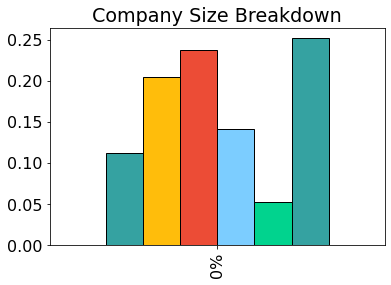

In [29]:
plt.figure(figsize=(30, 6))
plt.rc('font', size=16)
# axis=1 in .apply means row by row
(company_size_df.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='Micro')
 .plot.bar(width=1, ec='black', legend=None))
plt.title('Company Size Breakdown')
plt.ylabel(None)
plt.yticks(None)



plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

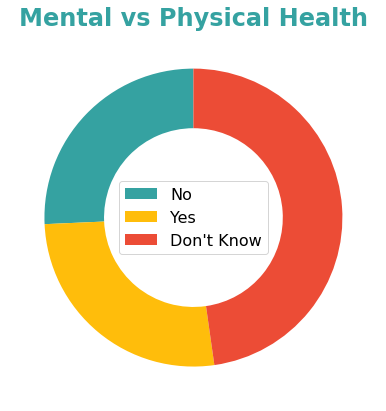

In [30]:
# visualize distribution of mental vs physical 
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
cs_customer= np.linspace(0, 1, 5)
target = ['No', 'Yes', "Don't Know"]
data = [246, 254, 457]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=90)
plt.legend(wedges, target, loc="center",fontsize=16)
ax.set_title("Mental vs Physical Health", color=keppel, fontdict={'fontsize': 24, 'fontweight': 'bold'})
fig.tight_layout()
# plt.savefig('mental_vs_phys_donut.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

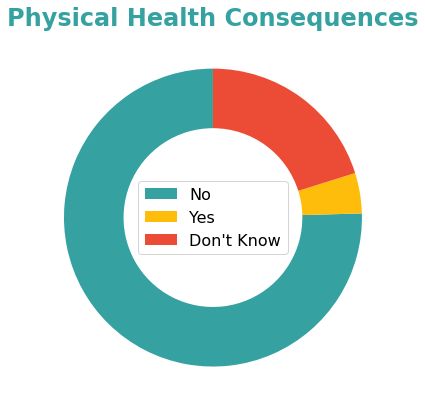

In [31]:
# visualize distribution of phys_health_consequence
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
cs_customer= np.linspace(0, 1, 5)
target = ['No', 'Yes', "Don't Know"]
data = [722, 42, 193]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=90)
plt.legend(wedges, target, loc="center",fontsize=16)
ax.set_title("Physical Health Consequences", color=keppel, fontdict={'fontsize': 24, 'fontweight': 'bold'})
fig.tight_layout()
plt.savefig('phys_cons_donut.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

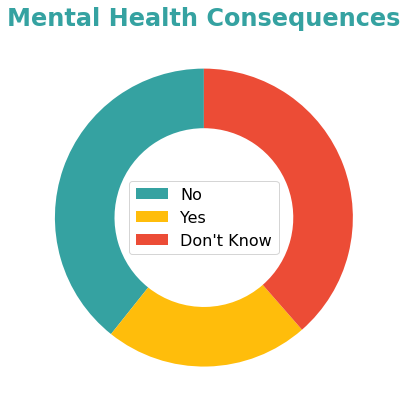

In [32]:
# visualize distribution of mental_health_consequence
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
cs_customer= np.linspace(0, 1, 5)
target = ['No', 'Yes', "Don't Know"]
data = [376, 212, 369]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=90)
plt.legend(wedges, target, loc="center",fontsize=16)
ax.set_title("Mental Health Consequences", color=keppel, fontdict={'fontsize': 24, 'fontweight': 'bold'})
fig.tight_layout()
plt.savefig('mental_cons_donut.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

## Visuals for what the Companies are doing well?

#### Physical Health Consequences

In [33]:
encoded_df['phys_health_consequence'].value_counts()

0    722
2    193
1     42
Name: phys_health_consequence, dtype: int64

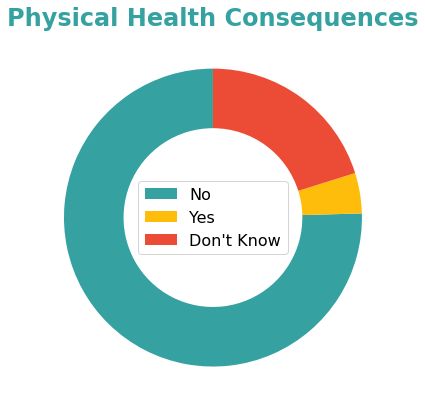

In [34]:
# visualize distribution of phys_health_consequence
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
cs_customer= np.linspace(0, 1, 5)
target = ['No', 'Yes', "Don't Know"]
data = [722, 42, 193]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=90)
plt.legend(wedges, target, loc="center",fontsize=16)
ax.set_title("Physical Health Consequences", color=keppel, fontdict={'fontsize': 24, 'fontweight': 'bold'})
fig.tight_layout()
plt.savefig('phys_cons_donut.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

#### Observed Consequences

In [35]:
encoded_df['obs_consequence'].value_counts()

0    842
1    115
Name: obs_consequence, dtype: int64

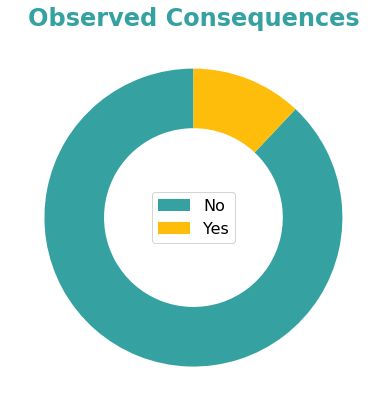

In [36]:
# visualize distribution of phys_health_consequence
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
cs_customer= np.linspace(0, 1, 5)
target = ['No', 'Yes']
data = [842, 115]
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=90)
plt.legend(wedges, target, loc="center",fontsize=16)
ax.set_title("Observed Consequences", color=keppel, fontdict={'fontsize': 24, 'fontweight': 'bold'})
fig.tight_layout()
plt.savefig('obs_cons_donut.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

### Hypothesis Testing Visuals

In [37]:
encoded_df['supervisor'].value_counts()

1    381
0    301
2    275
Name: supervisor, dtype: int64

### Physical Health Consequences

In [38]:
# new dataframe, controlling for 
phys_con_df = hot_df[['phys_health_consequence_0', 'phys_health_consequence_1', 'phys_health_consequence_2']]

In [39]:
phys_con_0 = pd.Series(phys_con_df['phys_health_consequence_0'].sum())
phys_con_1 = pd.Series(phys_con_df['phys_health_consequence_1'].sum())
phys_con_2 = pd.Series(phys_con_df['phys_health_consequence_2'].sum())
phys_con_all = pd.Series(phys_con_0 + phys_con_1 + phys_con_2)

In [40]:
phys_con_df = pd.concat([phys_con_0, phys_con_1, phys_con_2, phys_con_all], axis=1).fillna(0).astype(int)
phys_con_df.columns = ['No', 'Yes', 'Maybe', 'all']
phys_con_df.head()

,No,Yes,Maybe,all
0,722,42,193,957


<Figure size 2160x432 with 0 Axes>

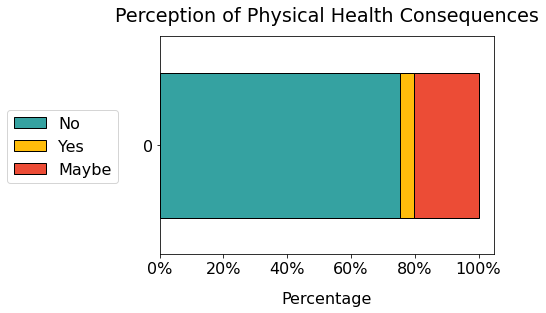

In [41]:
plt.figure(figsize=(30, 6))
plt.rc('font', size=16)
# axis=1 in .apply means row by row
(phys_con_df.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='No')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('Perception of Physical Health Consequences', pad=15)
plt.xlabel('Percentage', labelpad=15)
plt.ylabel(None)
plt.yticks(None)
plt.legend(bbox_to_anchor=(-.1,.7))


plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
plt.savefig('phys_con_100_bar.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

# Observed Consequence 

In [42]:
strings_df.obs_consequence.value_counts()

0    842
1    115
Name: obs_consequence, dtype: int64

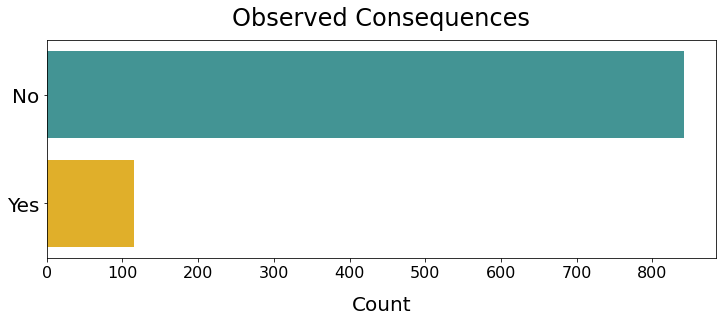

In [43]:
plt.figure(figsize=(12,4))
sns.countplot(y='obs_consequence', data=encoded_df, color=keppel, palette=colors)
plt.title('Observed Consequences', fontsize=24, pad=15)
plt.yticks(np.arange(2), ['No', 'Yes'], fontsize=20)
plt.xlabel('Count', fontsize=20, labelpad=15)
plt.ylabel(None)
plt.savefig('obs_cons_uni_barh.png',dpi=100, format='png', bbox_inches='tight')
plt.show()